In [263]:
# Імпорт
import numpy as np
import pandas as pd
from math import sqrt;

import seaborn as sns
import joblib as joblib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, f1_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Функції 
def plot_dataset(df):
    x1, x2 = df['isMalware'].value_counts()
    values = np.array([x1, x2])
    label = ["Звичайне ПЗ", "Зловмисне ПЗ"]
    plt.pie(values, labels = label)
    plt.show()
    print("Звичайне ПЗ : ", x1, 'прикладів')
    print("Зловмисне ПЗ:", x2, 'прикладів')

def stat_dataset(df,param):
    
    x1 = df.loc[df.isMalware==1, param]
    x2 = df.loc[df.isMalware==0, param]
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':3})
    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(x1, color="orange", label="Зловмисне ПЗ", **kwargs, kde=False)
    sns.distplot(x2, color="green", label="Звичайне ПЗ", **kwargs, kde=False)
    plt.ylabel = param
    plt.legend();
    plt.show()
    
def plot_features(importance,names):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(15,10))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.ylim(0, 40)
    print(fi_df.to_string())
    #Збереження таблиці ваг функцій
    fi_df.to_csv('features.csv')
    


# Імпорт змішаного датасету, перевірка на пустоту й статистика датасету

Характеристики датасету: 
       Src_Port  Dst_Port  Bytes_in  ...  ec_pts_0  ec_pts_1  isMalware
0         49754       443      6856  ...         1         0          1
1         49769       449      1578  ...         1         0          1
2         49777       449      1541  ...         1         0          1
...         ...       ...       ...  ...       ...       ...        ...
41463     43303       443      1813  ...         1         0          0
41464     46723       443      1813  ...         1         0          0
41465     43075       443      1674  ...         1         0          0

[41466 rows x 439 columns]


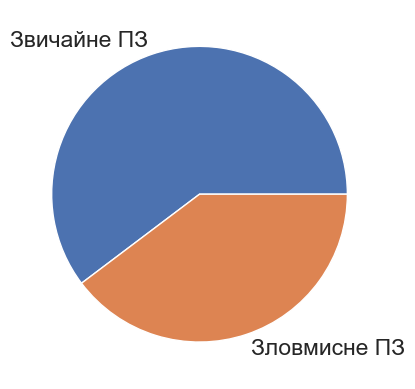

Звичайне ПЗ :  24999 прикладів
Зловмисне ПЗ: 16467 прикладів
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41466 entries, 0 to 41465
Columns: 439 entries, Src_Port to isMalware
dtypes: float64(3), int64(436)
memory usage: 138.9 MB


C:\Users\PC\AppData\Local\Temp\ipykernel_6880\3203755968.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, color="orange", label="Зловмисне ПЗ", **kwargs, kde=False)
C:\Users\PC\AppData\Local\Temp\ipykernel_6880\3203755968.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, color="gr

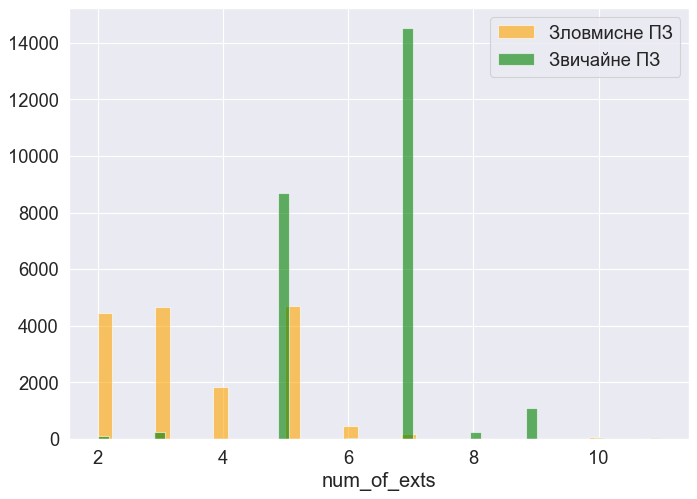

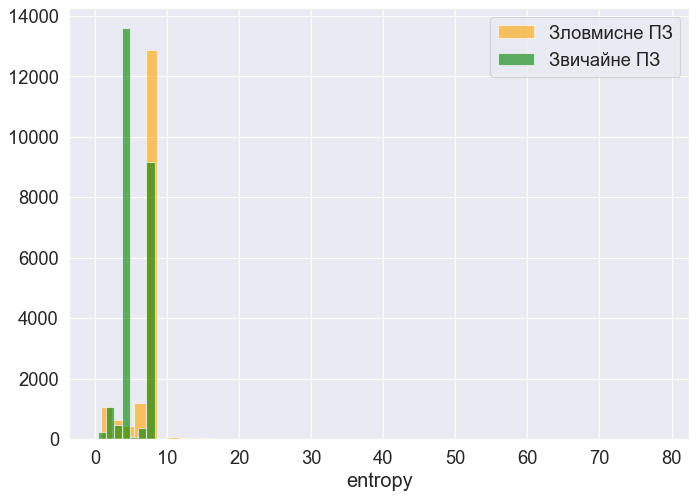

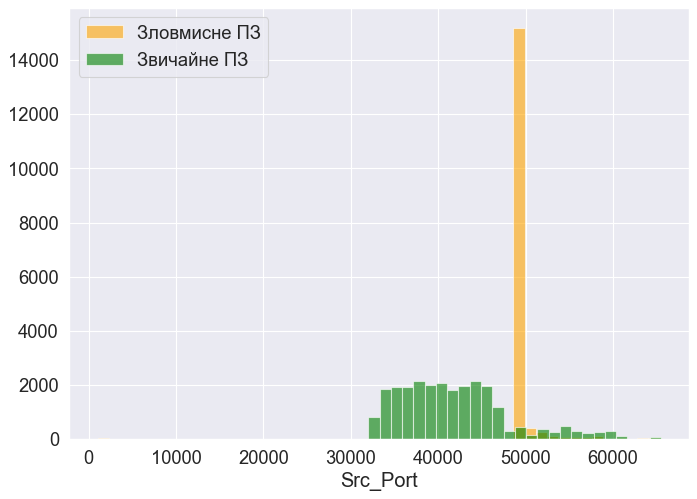

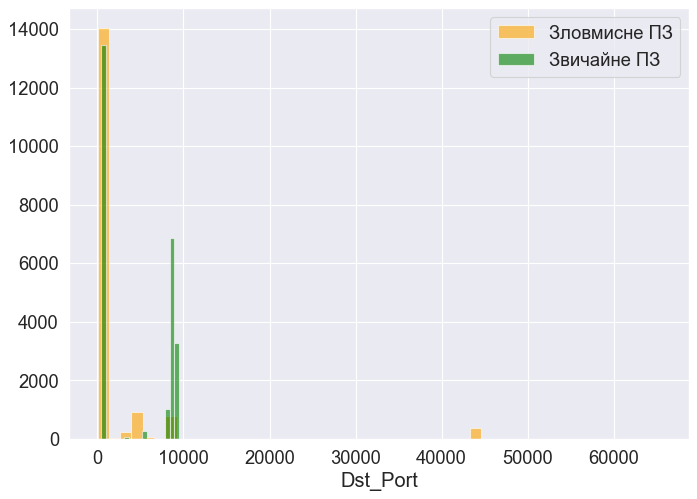

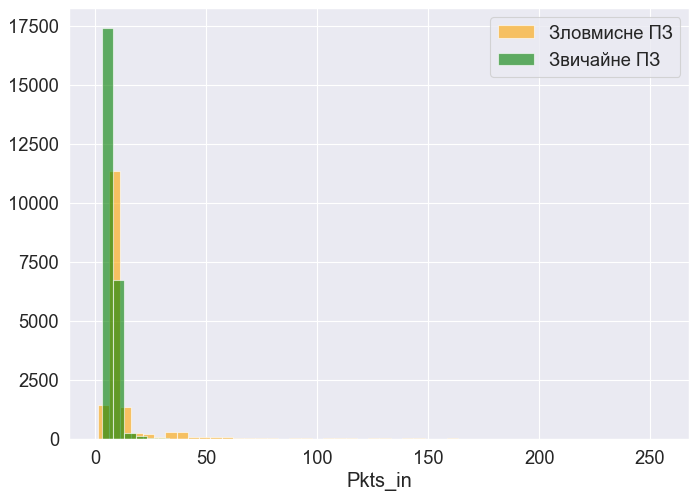

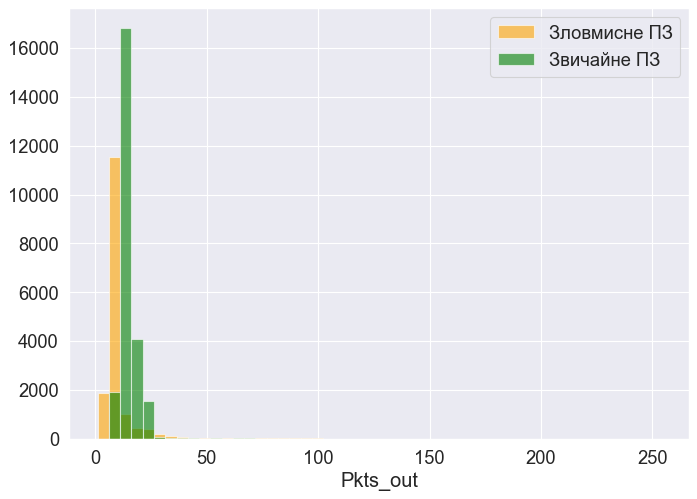

In [266]:
mixed_Dataframe = pd.read_csv('mixed_flows.csv')

print('Характеристики датасету: ')
with pd.option_context('display.max_rows', 7,
                       'display.max_columns', 7,
                       'display.precision', 5,
                       ):print(mixed_Dataframe)
mixed_Dataframe.isna().sum()


# Статистика
plot_dataset(mixed_Dataframe)

mixed_Dataframe.info()

stat_dataset(mixed_Dataframe, 'num_of_exts')
stat_dataset(mixed_Dataframe, 'entropy')
stat_dataset(mixed_Dataframe, 'Src_Port')
stat_dataset(mixed_Dataframe, 'Dst_Port')
stat_dataset(mixed_Dataframe, 'Pkts_in')
stat_dataset(mixed_Dataframe, 'Pkts_out')




# Створення, навчання, 5-кратна кросвалідаційна перевірка моделі для кращих гіпермараметрів

In [159]:
# Ізолювання залежною змінної від датасету
reduced_y = mixed_Dataframe['isMalware']
reduced_x = mixed_Dataframe.drop(['isMalware'], axis=1);
train_X, test_X, train_Y, test_Y = train_test_split(reduced_x, reduced_y, test_size=0.25)

# Створення класифікатора
objRF = RandomForestClassifier()
params = {
    "n_estimators": [7,20,50,100,200],
    "max_depth": [10,30,50,90,120],
    "min_samples_leaf" : [2, 4, 6, 8, 12]
}
# Навчання моделі, використовуючи таблицю гіперпараметрів
clf = GridSearchCV(objRF, param_grid=params, cv=5)
clf.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 30, 50, 90, 120],
                         'min_samples_leaf': [2, 4, 6, 8, 12],
                         'n_estimators': [7, 20, 50, 100, 200]})

In [201]:
print('Найкращі гіперпараметри моделі:', clf.best_params_)

Найкращі гіперпараметри моделі: {'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 50}


In [202]:
print('Найкраща точність моделі:',clf.best_score_)

Найкраща точність моделі: 0.9991639716272454


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6249
           1       1.00      1.00      1.00      4118

    accuracy                           1.00     10367
   macro avg       1.00      1.00      1.00     10367
weighted avg       1.00      1.00      1.00     10367

Точність на тестовій вибірці:  0.9993247805536799
Матриця істини:


<AxesSubplot: >

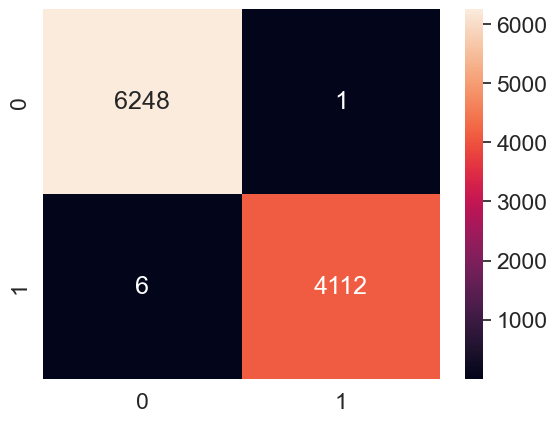

In [264]:
testPredict = clf.predict(test_X)
print(classification_report(test_Y, testPredict))

print('Точність на тестовій вибірці: ', accuracy_score(test_Y, testPredict))
cm = confusion_matrix(test_Y, testPredict)
print('Матриця істини:')
sns.heatmap(cm,annot=True,fmt="d")

Найважливіші функції та їх вага:
     feature_names  feature_importance
49              29        1.051501e-01
45              25        7.604908e-02
48              28        7.137013e-02
47              27        4.636896e-02
36            001A        4.255875e-02
42              22        4.092601e-02
50            002a        3.768059e-02
0         Src_Port        3.742800e-02
43              23        3.637318e-02
34              18        3.269597e-02
33              17        3.070757e-02
41              21        2.591043e-02
9      num_of_exts        2.553160e-02
362          ext_5        2.294391e-02
80              69        2.250951e-02
46              26        1.887842e-02
5         Pkts_out        1.885568e-02
35              19        1.808570e-02
410           sg_0        1.588062e-02
37            001B        1.578262e-02
364          ext_7        1.565399e-02
32              16        1.530680e-02
367         ext_10        1.186791e-02
44              24        1.119

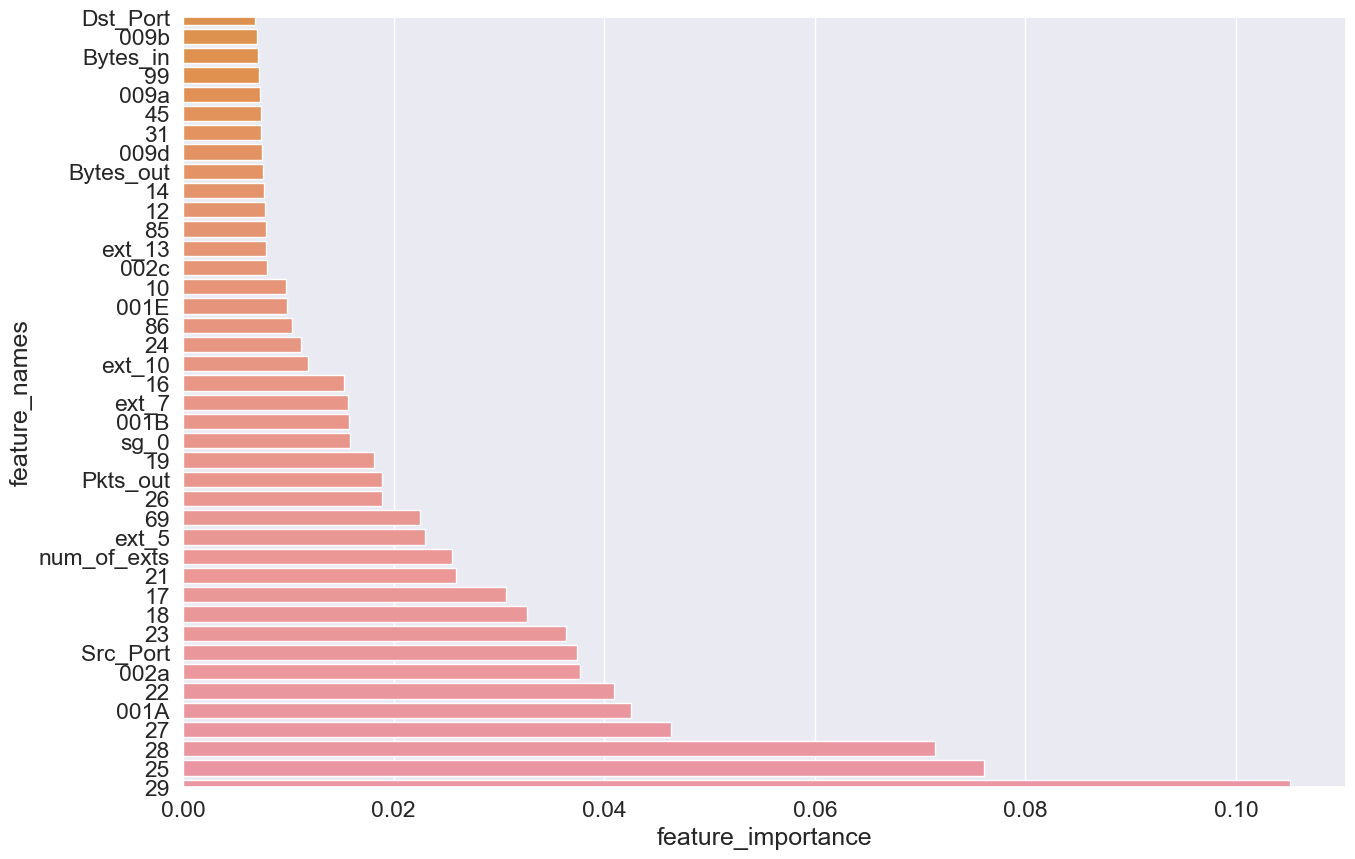

In [262]:
print('Найважливіші функції та їх вага:')
plot_features(clf.best_estimator_.feature_importances_,train_X.columns)

C:\Users\PC\AppData\Local\Temp\ipykernel_6880\3203755968.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, color="orange", label="Зловмисне ПЗ", **kwargs, kde=False)
C:\Users\PC\AppData\Local\Temp\ipykernel_6880\3203755968.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, color="gr

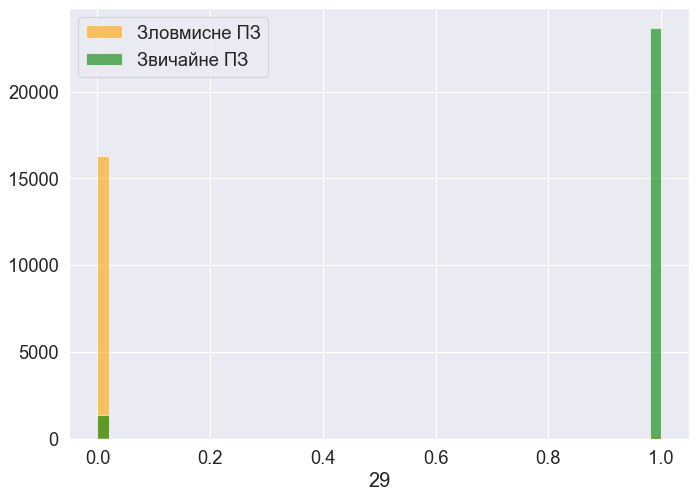

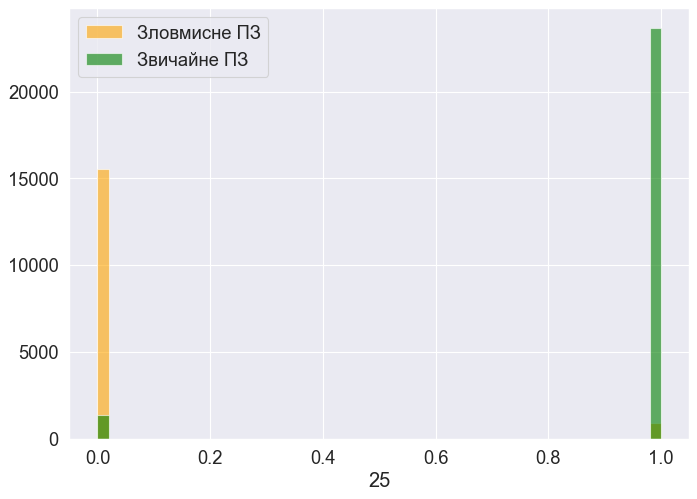

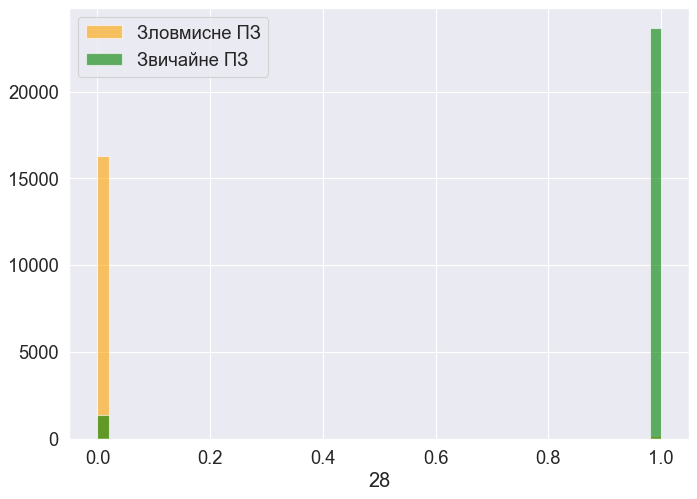

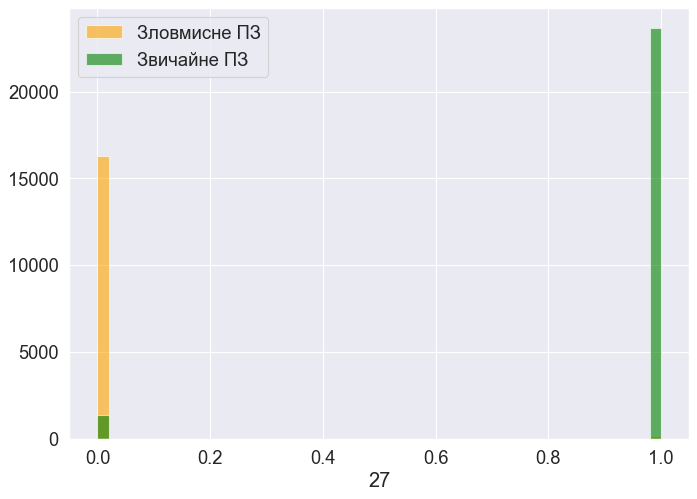

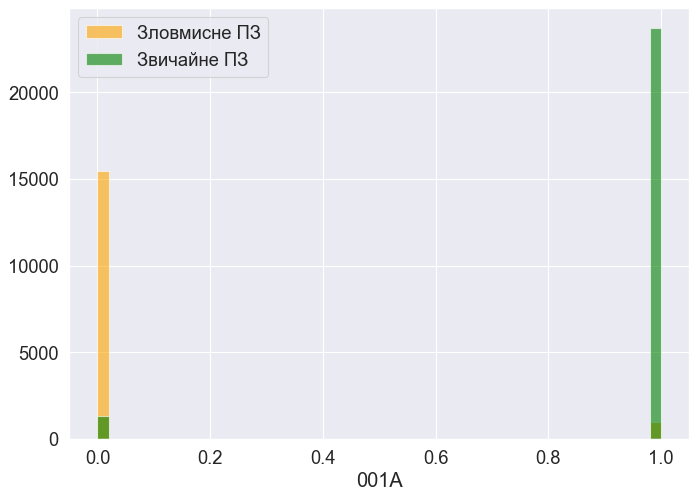

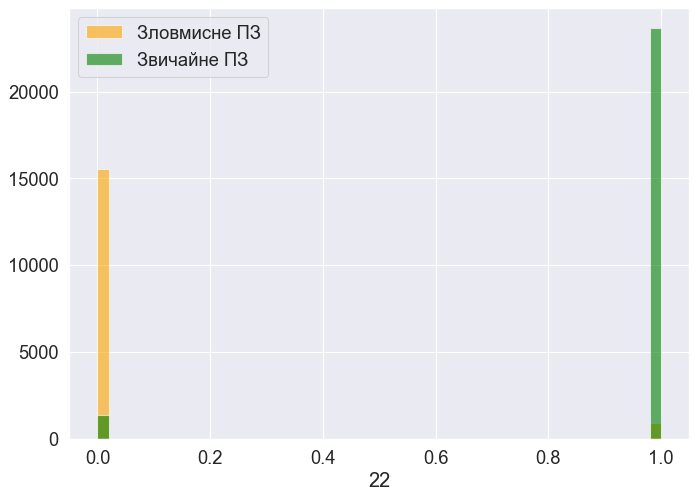

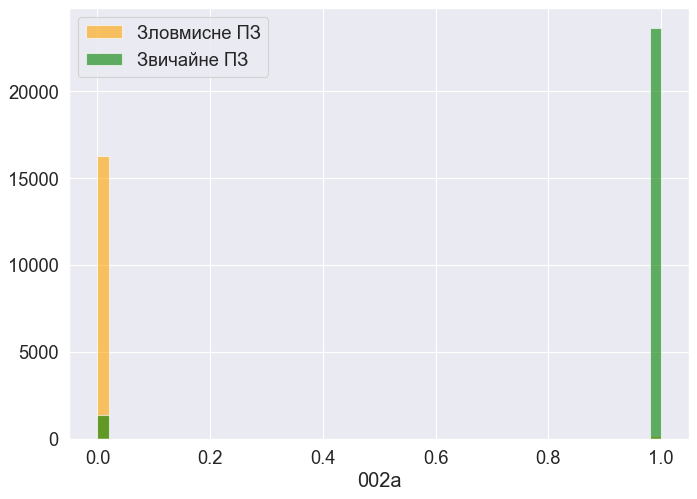

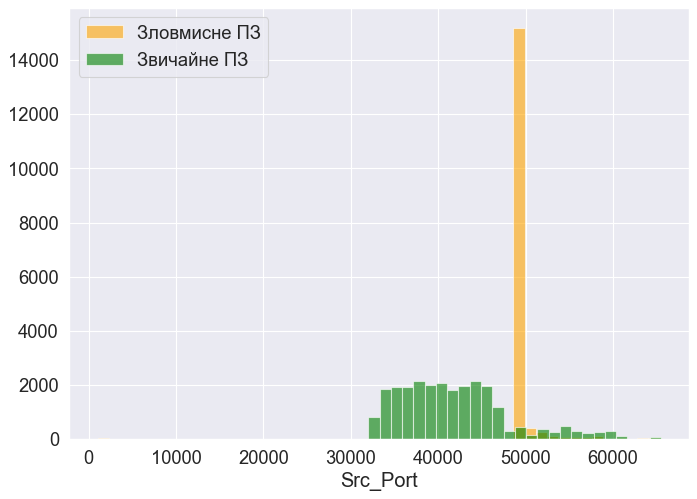

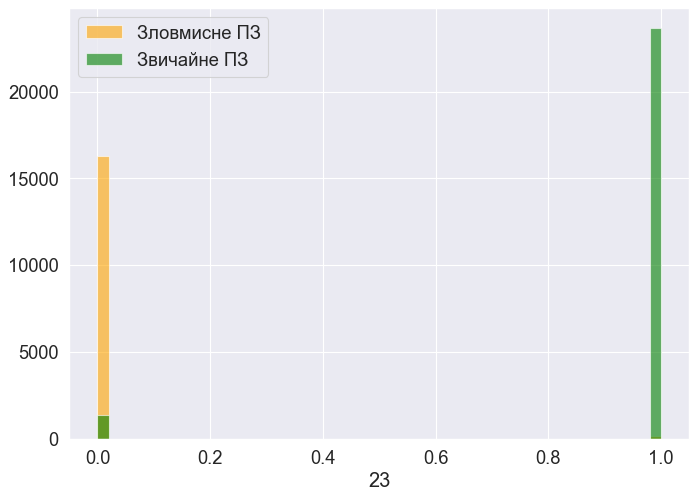

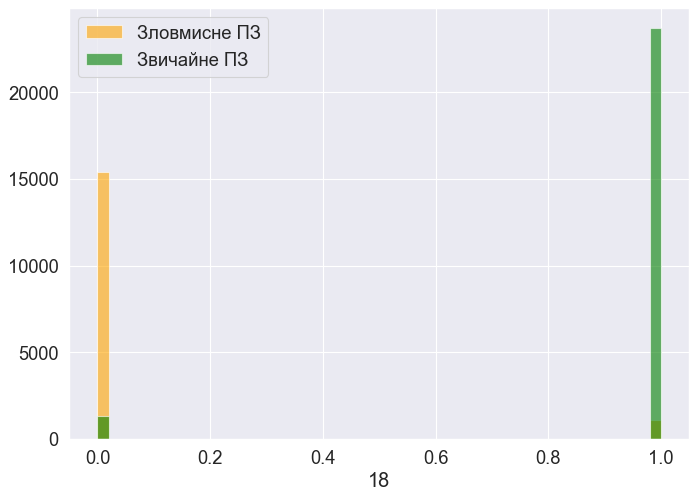

In [267]:
stat_dataset(mixed_Dataframe, '29')
stat_dataset(mixed_Dataframe, '25')
stat_dataset(mixed_Dataframe, '28')
stat_dataset(mixed_Dataframe, '27')
stat_dataset(mixed_Dataframe, '001A')
stat_dataset(mixed_Dataframe, '22')
stat_dataset(mixed_Dataframe, '002a')
stat_dataset(mixed_Dataframe, 'Src_Port')
stat_dataset(mixed_Dataframe, '23')
stat_dataset(mixed_Dataframe, '18')


In [217]:
print('Збережено модель: ')
print(clf)
joblib.dump(clf, "trained_model_1.pkl")

print('Завантажено модель: ')
model = joblib.load("trained_model_1.pkl")
print(model.best_estimator_.feature_names_in_)

Збережено модель: 
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 30, 50, 90, 120],
                         'min_samples_leaf': [2, 4, 6, 8, 12],
                         'n_estimators': [7, 20, 50, 100, 200]})
Завантажено модель: 
['Src_Port' 'Dst_Port' 'Bytes_in' 'Bytes_out' 'Pkts_in' 'Pkts_out'
 'entropy' 'byte_dist_std' 'byte_dist_mn' 'num_of_exts' '0' '1' '2' '3'
 '4' '5' '6' '7' '8' '9' '000a' '000b' '000c' '000d' '000e' '000f' '10'
 '11' '12' '13' '14' '15' '16' '17' '18' '19' '001A' '001B' '001E' '001F'
 '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '002a' '002b' '002c'
 '002d' '002e' '002f' '30' '31' '32' '33' '35' '36' '37' '38' '39' '003a'
 '003b' '003c' '003d' '003e' '003f' '40' '41' '42' '43' '44' '45' '46'
 '67' '68' '69' '006a' '006b' '006c' '006d' '84' '85' '86' '87' '88' '89'
 '008a' '008b' '008c' '008d' '008e' '008f' '90' '91' '92' '93' '94' '95'
 '96' '97' '98' '99' '009a' '009b' '009c' '009d' '009e' '009f' '00a